In [95]:
## generic imports 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn import metrics

from sklearn.naive_bayes import CategoricalNB
import numpy as np

import matplotlib.pyplot as plt
import os
import os.path
from pathlib import Path
import glob
import random
from PIL import Image
import shutil

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [97]:
dataset_path = "/Users/griffinsnider/Desktop/project2_data/asl_alphabet_train/asl_alphabet_train"  #adjust as needed

training_folders = glob.glob(os.path.join(dataset_path, "*"))
training_classes = sorted([os.path.basename(folder) for folder in training_folders])

print("Dataset Classes:\n---------------")
for i, the_class in enumerate(training_classes, start=1):
    print(f'{i}: {the_class}')

Dataset Classes:
---------------
1: A
2: B
3: C
4: D
5: E
6: F
7: G
8: H
9: I
10: J
11: K
12: L
13: M
14: N
15: O
16: P
17: Q
18: R
19: S
20: T
21: U
22: V
23: W
24: X
25: Y
26: Z
27: del
28: nothing
29: space


In [99]:
asl_keep = [
    "A", "B", "C", "D", "E", "F", "H", "I", "L", 
    "O", "Q", "R", "S", "U", "V", "W", "X", "Y", 
]

print("Dataset Classes:\n---------------")
for i, letter in enumerate(asl_keep, start=1):
    print(f"{i}: {letter}", end=", " if i < len(asl_keep) else "\n")

asl_paths_train = []
for asl_letter in asl_keep:
    folder_path = os.path.join(dataset_path, asl_letter, "*.jpg")
    asl_paths_train.extend(glob.glob(folder_path, recursive=True))

asl_labels_train = []
for img_path in asl_paths_train:
    letter_label = os.path.basename(os.path.dirname(img_path))  
    asl_labels_train.append(letter_label)
    
train_asl_df = pd.DataFrame({"image_path": asl_paths_train, "letter_label": asl_labels_train})

print("-----------------------\nSome Train Data Results:")
display(train_asl_df.sample(frac=1).head(5))

Dataset Classes:
---------------
1: A, 2: B, 3: C, 4: D, 5: E, 6: F, 7: H, 8: I, 9: L, 10: O, 11: Q, 12: R, 13: S, 14: U, 15: V, 16: W, 17: X, 18: Y
-----------------------
Some Train Data Results:


,image_path,letter_label
21583,/Users/griffinsnider/Desktop/project2_data/asl...,I
14777,/Users/griffinsnider/Desktop/project2_data/asl...,E
40144,/Users/griffinsnider/Desktop/project2_data/asl...,U
28321,/Users/griffinsnider/Desktop/project2_data/asl...,O
18735,/Users/griffinsnider/Desktop/project2_data/asl...,H


In [105]:
letter_counts = Counter(asl_labels_train)

letter_df = pd.DataFrame(letter_counts.items(), columns=["Letter", "Image Count"])
letter_df = letter_df.sort_values(by="Image Count", ascending=False)

print("Dataset Summary:")
print(f"Total Images: {len(asl_paths_train)}")
print(f"Total Classes: {len(letter_df)}")
display(letter_df)

Dataset Summary:
Total Images: 54000
Total Classes: 18


,Letter,Image Count
0,A,3000
1,B,3000
16,X,3000
15,W,3000
14,V,3000
13,U,3000
12,S,3000
11,R,3000
10,Q,3000
9,O,3000


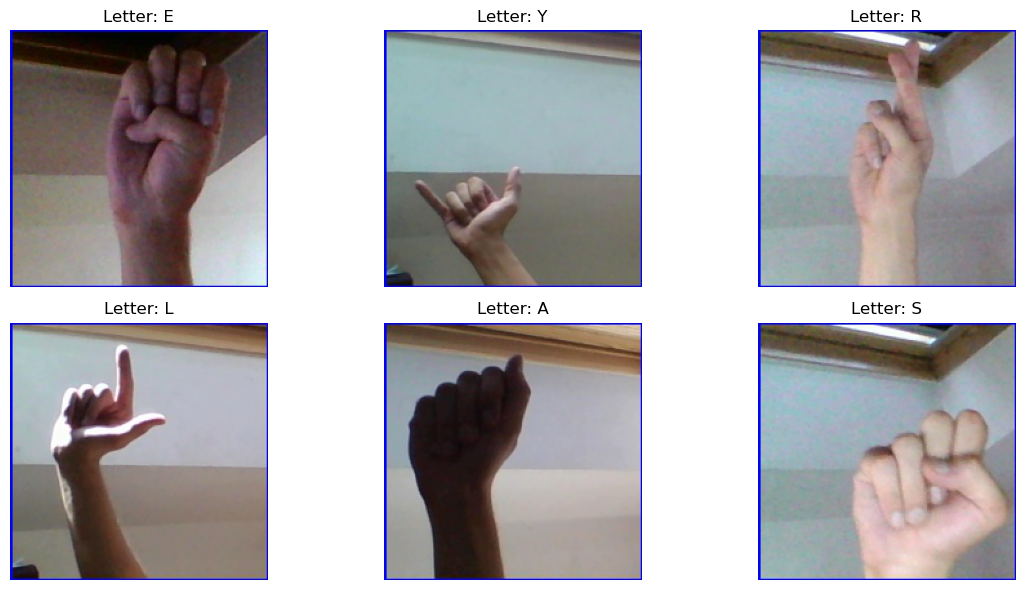

In [103]:
num_samples = 6

sample_paths = random.sample(asl_paths_train, num_samples)

plt.figure(figsize=(12, 6))

for i, img_path in enumerate(sample_paths):
    img = Image.open(img_path)
    letter_label = os.path.basename(os.path.dirname(img_path))
    
    plt.subplot(2, 3, i+1)
    plt.imshow(img)
    plt.title(f"Letter: {letter_label}")
    plt.axis("off")

plt.tight_layout()
plt.show()